In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report
import numpy as np
import os
%matplotlib inline


Using TensorFlow backend.


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [3]:
df = pd.read_csv("train.csv.zip", index_col=0)

In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## Forest Cover Dataset

This is the 'sort of famous' forest cover dataset.  Our goal is to predict the forest cover type, given the other variables.

That means that'Cover_Type' is our dependent variable.

Q1:  What columns are present in the dataframe?

In [5]:
#list(df)

Q2: What is the distribution of the dependent variable?

It has a mean of 4 with a STD of 2, max is 7 min is 1.

In [6]:
#df.describe().transpose()

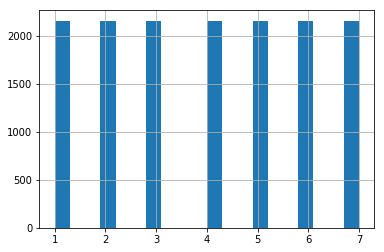

In [7]:
df['Cover_Type'].hist(bins=20)
plt.show()

In [8]:
def load_data():
    df = pd.read_csv("train.csv.zip", index_col=0)
    y = df.Cover_Type
    y = to_categorical(y)
    X = df.drop(["Cover_Type"], axis=1)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
    return X_train, X_val, X_test, y_train, y_val, y_test, scaler

Q3: In the above code, what purpose does to_categorical serve?
In the above, the to_categorical serves the purpose much like it says to make the variable a category. The overall purpose would be that when the network performs its task, instead of the ouput being numerical per se, which can have any real number value, it forces the output to be one of a finite number of categories. You would not want an output of 2.342938598 to represent a Cover_Type of 2. Thus it would force the output to be a 2 or 3.

In [9]:
def build_network(input_features=None):
    inputs = Input(shape=(input_features,), name="input")
    #implement the code to create a keras MLP here.  
    # remember your output layer will need to use softmax activation
    x=Dense(54, activation='relu', name="hidden1")(inputs)
    #x=Dropout(0.5)(x)
    x=Dense(54, activation='relu', name="hidden2")(x)
    #x=Dropout(0.5)(x)
    x=Dense(54, activation='relu', name="hidden3")(x)
    #x=Dropout(0.5)(x)
    x=Dense(54, activation='relu', name="hidden4")(x)
    #x=Dropout(0.5)(x)
    #x=Dense(26, activation='relu', name="hidden5")(x)
    #x=Dropout(0.5)(x)
   
    prediction = Dense(8, activation='softmax', name="output")(x)
    model = Model(inputs=inputs, outputs=prediction)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
    return model

In [10]:
def create_callbacks():
    fn = os.getcwd()
    tensorboard_callback=TensorBoard(log_dir=fn+'\\logs',
                                    histogram_freq=1, batch_size=32, write_graph=True,
                                    write_grads=False)
    return [tensorboard_callback]

In [11]:
X_train, X_val, X_test, y_train, y_val, y_test, scaler = load_data()
callbacks = create_callbacks()
model = build_network(X_train.shape[1])

In [12]:
model.fit(x=X_train, y=y_train,
          batch_size=100,
          epochs=50,
          validation_data=(X_val, y_val),
          verbose=1,callbacks=callbacks)

Train on 10584 samples, validate on 2268 samples
Epoch 1/50
10584/10584 [==============================] - 1s 51us/step - loss: 1.3935 - acc: 0.4859 - val_loss: 0.8713 - val_acc: 0.6332
Epoch 2/50
10584/10584 [==============================] - 0s 20us/step - loss: 0.8147 - acc: 0.6597 - val_loss: 0.7669 - val_acc: 0.6693
Epoch 3/50
10584/10584 [==============================] - 0s 21us/step - loss: 0.7216 - acc: 0.6994 - val_loss: 0.7054 - val_acc: 0.7006
Epoch 4/50
10584/10584 [==============================] - 0s 21us/step - loss: 0.6646 - acc: 0.7190 - val_loss: 0.6763 - val_acc: 0.7006
Epoch 5/50
10584/10584 [==============================] - 0s 20us/step - loss: 0.6311 - acc: 0.7387 - val_loss: 0.6441 - val_acc: 0.7244
Epoch 6/50
10584/10584 [==============================] - 0s 20us/step - loss: 0.6072 - acc: 0.7448 - val_loss: 0.6448 - val_acc: 0.7275
Epoch 7/50
10584/10584 [==============================] - 0s 21us/step - loss: 0.5889 - acc: 0.7542 - val_loss: 0.6181 - val_acc:

### Build the best model you can, experimenting with hyperparameters before proceeding

In [13]:
loss, accuracy = model.evaluate(X_test, y=y_test)
print("\n model test loss is "+str(loss)+" accuracy is "+str(accuracy))

2268/2268 [==============================] - 0s 19us/step

 model test loss is 0.5277782116196984 accuracy is 0.8059964724528936


In [14]:
y_softmax = model.predict(X_test)  # this is an n x class matrix of probabilities
y_hat = y_softmax.argmax(axis=-1)  # this will be the class number.
y_test_cat = y_test.argmax(axis=-1)  # our test data is also categorical
print(classification_report(y_test_cat, y_hat))

             precision    recall  f1-score   support

          1       0.74      0.71      0.72       312
          2       0.69      0.60      0.64       290
          3       0.85      0.64      0.73       331
          4       0.89      0.95      0.92       315
          5       0.80      0.93      0.86       322
          6       0.71      0.87      0.78       343
          7       0.96      0.91      0.94       355

avg / total       0.81      0.81      0.80      2268



Q4: Explain in your own words what precsion, recall, and f1-score are.

Precision is the Ratio of items predicted true that are actually true and not falsely true. Thus for this example, if the precision value is lower, it means that there are a lot of false positives, or classifications that are untrue. Such as something being designated a 1 when it is really a 2 for Cover_Type. Recall is the ratio of items that are true with respect to those that are true and those that are falsely negative (which should be true) Thus a low value for recall would suggest that there are for excample category 1 items that are being declared as any of the other categories. F1 is composed of the precision and recall and varies from 0 to 1 or if scaled 0 to 100. F1 is a helpful measure when uneven class distributions exist. It is often a good measure of accuracy as it takes into consideration the precision and recall.

Q5: Is there a particular class that the model is best at predicting?
It seems like class 4 and class 7 are modeled the best.


Additional Notes:
Things I experimented with:
Dropout All Layers, single layer, starting at 0.5, used 0.8 Didnt really improve
More Epochs Tested to 100. Noticed that the Val_loss increased, overfitting suspected as Val_loss was about 0.2 higher than training loss. Changed it back to 50. Added layers 1 at a time up to 6. Looks like 5 layers of 54 nodes did the trick. I experimented with node sizes and when I decreased them everything seemed to go in the opposide direction. 

Unfortunately for me, this project had to be redone this morning and I didnt get to spend the time on it that I wanted.  A few days ago a power line near my house got struck by lightning and took out half the electronics in my house. Had to dig out an old laptop and replace my whole network despite being on surge protectors.

As you can probably see above I had to specify not to use GPU as mine isnt compatible. Also I had to use a separate file to house Tensorboard. That made things easier. (Next Time I will use a separate thread)

The code for that page is below:
import os
from tensorboard import default
from tensorboard import program

my_directory = os.getcwd()+'\\logs'
tb = program.TensorBoard(default.PLUGIN_LOADERS, default.get_assets_zip_provider())
tb.configure(argv=['--logdir', my_directory])
tb.main()

I wonder what the expected accuracy is, and if its 100% then wow... im in trouble. Please post solutions to your problems after grading if you would. (or upload to github)